## FACE EMOTION PREDICTION 

In [1]:
# ignoring warings 


import warnings 
warnings.filterwarnings("ignore")

## Loading trained model

In [3]:
from tensorflow.keras.models import load_model 

emotion_model = load_model('faceEmotionRecog.h5') 

## Prediction system for face emotion 

In [6]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 


def predict_emotion(img_path):
    class_labels = ['angry', 'happy', 'neutral', 'sad', 'surprise'] 
    frame = cv2.imread(img_path) 
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 
    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

    faces = faceCascade.detectMultiScale(gray_img, 1.1, 4)
    
    if len(faces) != 0:
        for (x, y, w, h) in faces:
            rec_gray = gray_img[y:y+h, x:x+w] 
            cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2) 

            final_img = cv2.resize(rec_gray, (48, 48))            
            final_img = np.expand_dims(final_img, axis=0) 
            final_img = np.expand_dims(final_img, axis=-1) 
            final_img = final_img/255.0 

            prediction = emotion_model.predict(final_img) 
            result = class_labels[np.argmax(prediction[0])]

            font = cv2.FONT_HERSHEY_SIMPLEX
            org = (x, y-10)  
            fontScale = 1
            color = (0, 255, 0)  
            thickness = 3
            cv2.putText(frame, result, org, font, fontScale, color, thickness, cv2.LINE_AA)

            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            
    else:
        print("no face available")

## Testing the prediction system

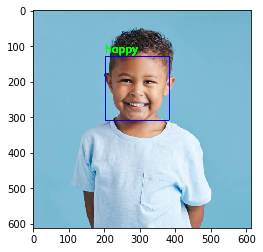

In [7]:
img_path = r"C:\Users\Mathivanan\Desktop\happyboy.jpg" 
predict_emotion(img_path)

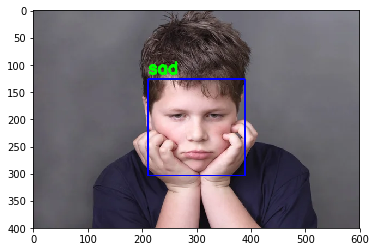

In [8]:
img_path=r"C:\Users\Mathivanan\Desktop\sadboyys.jpg"
predict_emotion(img_path)

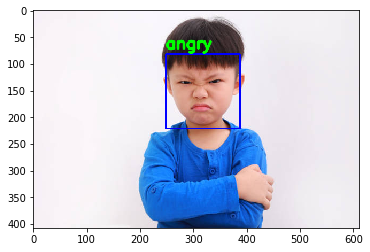

In [9]:
img_path=r"C:\Users\Mathivanan\Desktop\angryboy.jpg" 
predict_emotion(img_path)

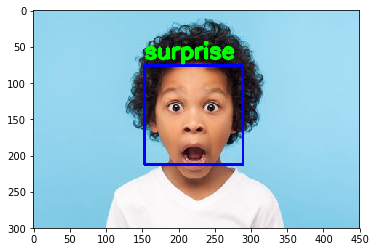

In [10]:
img_path=r"C:\Users\Mathivanan\Desktop\surpriseboyy.jpg" 
predict_emotion(img_path)

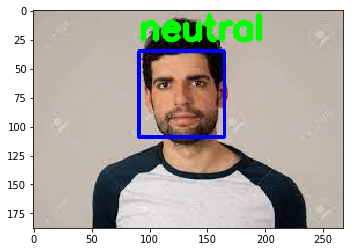

In [11]:
img_path=r"C:\Users\Mathivanan\Desktop\neutralboyy.jpg" 
predict_emotion(img_path)